In [1]:
from tensorflow.keras.models import load_model

model = load_model('quickdraw10_full.h5')

In [2]:
import numpy as np

In [3]:
x_test = np.load('x_test_full.npy')
y_test_cat = np.load('y_test_cat_full.npy')
print(x_test.shape)

(1000, 100, 100, 3)


In [4]:
#model.evaluate(x_test, y_test_cat)

In [5]:
import cv2
import matplotlib.pyplot as plt

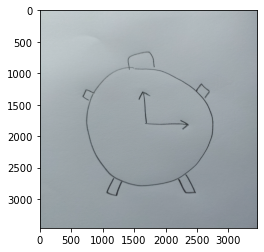

In [6]:
myalarmclock = cv2.imread('myalarmclock.jpg')
plt.imshow(myalarmclock)

In [7]:
alarm = cv2.resize(myalarmclock, (100,100))
alarm = alarm.reshape(1, 100, 100, 3)

In [8]:
print(alarm.shape)

(1, 100, 100, 3)


In [9]:
pred_alarm = model.predict(alarm)
cls_alarm = np.argmax(pred_alarm, axis = -1)
print(cls_alarm)

[2]


In [10]:
labels = ['aircraft carrier', 'airplane', 'alarm clock', 'ambulance', 'angel',
        'animal migration', 'ant', 'anvil', 'apple', 'arm']
print('Classification:', labels[cls_alarm[0]])

Classification: alarm clock


In [11]:
def detect(image):
    #image = cv2.imread('myangel.jpg')
    image = cv2.resize(image, (100,100))
    image = image.reshape(1, 100, 100, 3)
    pred_image = model.predict(image)
    cls_image = np.argmax(pred_image, axis = -1)
    
    return labels[cls_image[0]]

In [12]:
cap = cv2.VideoCapture('myDrawings_2.mp4')
ret, frame = cap.read()

Testing showed that my webcam captures at 640 width and 480 height

In [13]:
width = cap.get(3)   # float
height = cap.get(4) # float
width_new = int(width/2)
height_new = int(height/2)

In [14]:
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output_final.mp4',fourcc, 20.0, (height_new,width_new))

In [15]:
print(width,height)

1440.0 1920.0


In [16]:
point1 = (100,100)
point2 = (800,700)

In [17]:
while cap.isOpened():
    
    ret, frame = cap.read()
    
    if ret == True:
        #you will need this line if your video is rotated by 90deg
        frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
        
        #making the frame smaller speeds up processing
        frame = cv2.resize(frame,(height_new,width_new))
        
        frame_bb = cv2.rectangle(img=frame,pt1=point1,pt2=point2,color=(255,0,0),thickness=5)
        frame_txt = cv2.putText(frame_bb, 'Detection Area', (100,50),fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                                color=(255,0,0), fontScale=2, thickness = 2)

        label = detect(frame[point1[0]:point2[0],point1[1]:point2[1]])
        
        frame_detect = cv2.putText(frame_bb, str(label), (100,600),fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                                color=(0,255,0), fontScale=4, thickness = 2)

        #cv2.imshow('Image Frame', frame_txt) #frame_bb
    
        out.write(frame_detect)
        
        if cv2.waitKey(1) == 27:
            break

    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows

<function destroyAllWindows>